# DeepLearning
 - Smile face detection

## GPU settings

In [48]:
# Memory Allocation for using GPU 
import tensorflow as tf 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)


1 Physical GPUs, 1 Logical GPUs


## Preprocessing
 1. Import Packages
 2. Load Dataset

In [11]:
##
import numpy as np
import h5py
import os
import cv2
import matplotlib.pyplot as plt

## Load Dataset
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((train_x.shape[0]), 1)
    test_y = test_y.reshape((test_y.shape[0]), 1)

    return train_x, train_y, test_x, test_y


dataPath = r"D:\00_MLDL\00_BreadBrother\09_Smile_Face_Detection\archive"
trainFile = "train_happy.h5"
testFile = "test_happy.h5"
trainDataPath = os.path.join(dataPath, trainFile)
testDataPath = os.path.join(dataPath, testFile)

train_X, train_Y, test_X, test_Y = load_dataset(trainDataPath, testDataPath)

npDataPath = r"D:\00_MLDL\00_BreadBrother\09_Smile_Face_Detection\dataset"

np.save(os.path.join(npDataPath, "x_train_color.npy"), train_X)
np.save(os.path.join(npDataPath, "x_test_color.npy"), test_X)

print(f"train_X: {train_X.shape} / train_Y: {train_Y.shape}")
print(f"test_X: {test_X.shape} / test_Y: {test_Y.shape}")

train_X: (600, 64, 64, 3) / train_Y: (600, 1)
test_X: (150, 64, 64, 3) / test_Y: (150, 1)


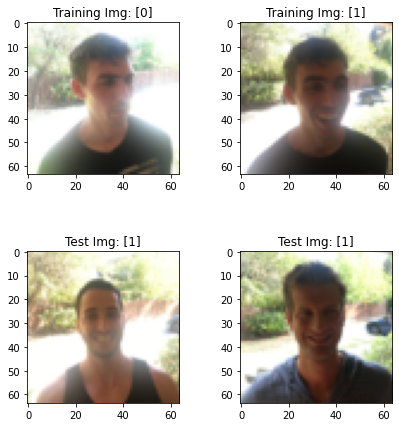

In [46]:
"""
Image Checking
"""
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
plt.title(f"Training Img: {train_Y[255]}")
plt.imshow(train_X[255])

plt.subplot(2,2,2)
plt.title(f"Training Img: {train_Y[256]}")
plt.imshow(train_X[256])

plt.subplot(2,2,3)
plt.title(f"Test Img: {test_Y[0]}")
plt.imshow(test_X[0])

plt.subplot(2,2,4)
plt.title(f"Test Img: {test_Y[1]}")
plt.imshow(test_X[1])

plt.subplots_adjust(hspace=0.5)

In [47]:
"""
RGB 2 GRAY
"""
x_result = []
for x in train_X:
    img = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    x_result.append(img)

x_result = np.array(x_result)
np.save(os.path.join(npDataPath, "x_train_gray.npy"), x_result)

x_result = []
for x in test_X:
    img = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    x_result.append(img)

x_result = np.array(x_result)
np.save(os.path.join(npDataPath, "x_test_gray.npy"), x_result)
np.save(os.path.join(npDataPath, "y_train_color.npy"), train_Y)
np.save(os.path.join(npDataPath, "y_test_color.npy"), test_Y)